In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#Loading the dataset:
data = pd.read_csv('/Users/damonharrington/Downloads/TESLA_stock_data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004,93983900
3590,2024-10-03,244.479996,249.789993,237.809998,240.660004,240.660004,80729200


In [5]:
# Assuming the 'Close' price column is to be predicted, adjust if column name is different
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare the dataset for RNN
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Use last 60 days to predict the next day
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
45/45 [==============================] - 2s 27ms/step - loss: 0.0061 - val_loss: 0.0037
Epoch 2/100
45/45 [==============================] - 1s 23ms/step - loss: 4.8014e-04 - val_loss: 0.0025
Epoch 3/100
45/45 [==============================] - 1s 23ms/step - loss: 3.5366e-04 - val_loss: 0.0034
Epoch 4/100
45/45 [==============================] - 1s 23ms/step - loss: 3.7073e-04 - val_loss: 0.0026
Epoch 5/100
45/45 [==============================] - 1s 23ms/step - loss: 2.9678e-04 - val_loss: 0.0029
Epoch 6/100
45/45 [==============================] - 1s 23ms/step - loss: 2.9766e-04 - val_loss: 0.0027
Epoch 7/100
45/45 [==============================] - 1s 23ms/step - loss: 2.7282e-04 - val_loss: 0.0020
Epoch 8/100
45/45 [==============================] - 1s 23ms/step - loss: 3.8921e-04 - val_loss: 0.0018
Epoch 9/100
45/45 [==============================] - 1s 23ms/step - loss: 2.5437e-04 - val_loss: 0.0018
Epoch 10/100
45/45 [==============================] - 1s 23ms/step -

45/45 [==============================] - 1s 29ms/step - loss: 7.6360e-05 - val_loss: 5.6092e-04
Epoch 78/100
45/45 [==============================] - 1s 29ms/step - loss: 7.8210e-05 - val_loss: 4.9373e-04
Epoch 79/100
45/45 [==============================] - 1s 28ms/step - loss: 7.6212e-05 - val_loss: 5.2459e-04
Epoch 80/100
45/45 [==============================] - 1s 29ms/step - loss: 7.8046e-05 - val_loss: 8.5395e-04
Epoch 81/100
45/45 [==============================] - 1s 28ms/step - loss: 8.0342e-05 - val_loss: 6.4824e-04
Epoch 82/100
45/45 [==============================] - 1s 28ms/step - loss: 8.1120e-05 - val_loss: 5.9257e-04
Epoch 83/100
45/45 [==============================] - 1s 28ms/step - loss: 8.2176e-05 - val_loss: 4.8268e-04
Epoch 84/100
45/45 [==============================] - 1s 30ms/step - loss: 9.6193e-05 - val_loss: 5.3504e-04
Epoch 85/100
45/45 [==============================] - 1s 31ms/step - loss: 8.6238e-05 - val_loss: 7.9533e-04
Epoch 86/100
45/45 [============

In [7]:
# Predict on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling for interpretation

# Reverse scaling for y_test as well for accurate comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 [==============================] - 0s 4ms/step


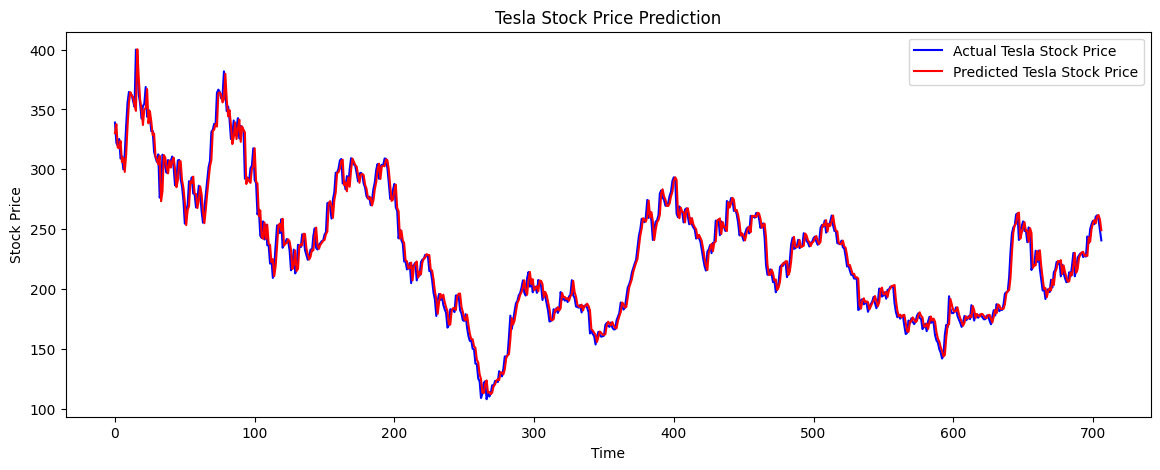

In [8]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled, color='blue', label='Actual Tesla Stock Price')
plt.plot(predictions, color='red', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 79.79354169488559
Mean Absolute Error: 6.508192502120259


In [10]:
from tensorflow.keras.layers import Dropout

# Build a more complex LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

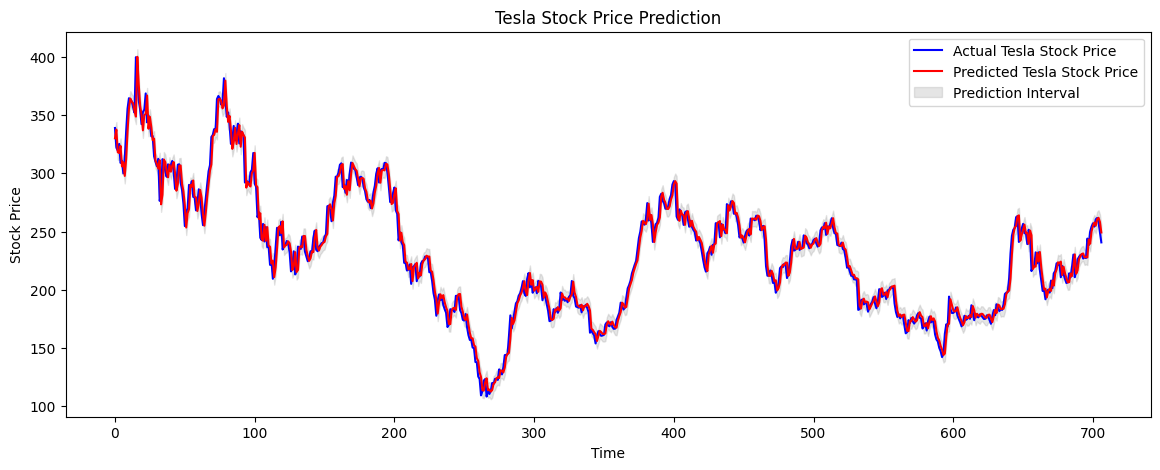

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled, color='blue', label='Actual Tesla Stock Price')
plt.plot(predictions, color='red', label='Predicted Tesla Stock Price')
plt.fill_between(
    range(len(predictions)), predictions.flatten() - 6.5, predictions.flatten() + 6.5,
    color='gray', alpha=0.2, label='Prediction Interval'
)
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [13]:
model.save('tesla_stock_prediction_model.h5')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import pandas as pd

# Load the dataset (assuming it's in the correct file path)
data = pd.read_csv('/Users/damonharrington/Downloads/TESLA_stock_data.csv')

# Assuming your stock prices are in a column called 'Close'
# Get the last 60 closing prices
new_data = data['Close'].values[-60:].reshape(-1, 1)

# Predict the stock price using the function
predicted_price = predict_stock_price(new_data, model, scaler)
print(f"Predicted Stock Price: {predicted_price}")

1/1 [==============================] - 0s 16ms/step
Predicted Stock Price: 27.150911331176758


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [17]:
# Scale the new data using the existing scaler
new_data_scaled = scaler.transform(new_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
# Predict using the model and inverse transform the scaled prediction
prediction_scaled = model.predict(new_data_scaled[-60:].reshape(1, 60, 1))
predicted_price = scaler.inverse_transform(prediction_scaled)
print(f"Predicted Stock Price: {predicted_price[0][0]}")

1/1 [==============================] - 0s 14ms/step
Predicted Stock Price: 27.150911331176758


In [19]:
# Scale the new data (make sure 'new_data' has 60 rows and 1 column)
new_data_scaled = scaler.transform(new_data)

# Reshape to fit model input requirements (batch_size=1, time_step=60, features=1)
X_input = new_data_scaled[-60:].reshape(1, 60, 1)

# Make prediction
prediction_scaled = model.predict(X_input)

# Inverse scale to get the predicted price in original units
predicted_price = scaler.inverse_transform(prediction_scaled)
print(f"Predicted Stock Price: {predicted_price[0][0]}")

1/1 [==============================] - 0s 15ms/step
Predicted Stock Price: 27.150911331176758


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
